In [1]:
#import libraries
import pandas as pd
import numpy as np

### Reading .csv Files 

In [2]:
#Reading .csv file to dataframe and Adding column names

customer_details = pd.read_csv('.\customer_details.csv')

In [3]:
#Reading .csv file to dataframe and Adding column names

customer_policy_details = pd.read_csv('.\customer_policy_details.csv')


 ## 1.Add the column names to both datasets:

### i. Column Names for customer details table

In [4]:
#Adding column names for customer_details table

customer_details.columns = ('customer_id','Gender','age', 'driving licence present','region code', 'previously insured','vehicle age','vehicle damage')
customer_details

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


### ii. Column Names for customer_policy table:

In [5]:
#Adding column names for customer_policy table

customer_policy_details.columns = ('customer_id','annual premium (in rs)','sales channel code','vintage','response')
customer_policy_details

,customer_id,annual premium (in rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


## 2. Checking and Cleaning Data Quality

### i. Null values

In [6]:
#Generate a summary of count of all the null values column wise

#for customer_details DataFrame

summary_of_null_values_for_customer_details = customer_details.isna().sum()
summary_of_null_values_for_customer_details

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

<AxesSubplot:>

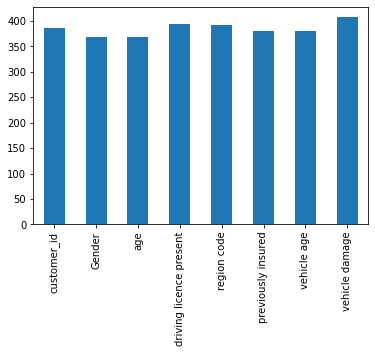

In [7]:
summary_of_null_values_for_customer_details.plot.bar()

<AxesSubplot:>

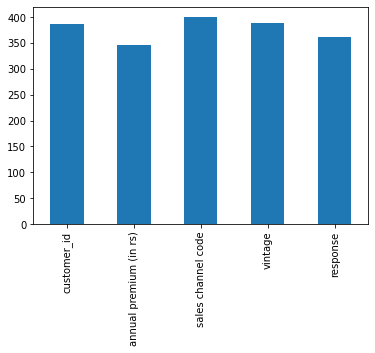

In [8]:
#for customer_policy_details DataFrame

summary_of_null_values_for_customer_policy_details = customer_policy_details.isna().sum()
summary_of_null_values_for_customer_policy_details.plot.bar()

<AxesSubplot:>

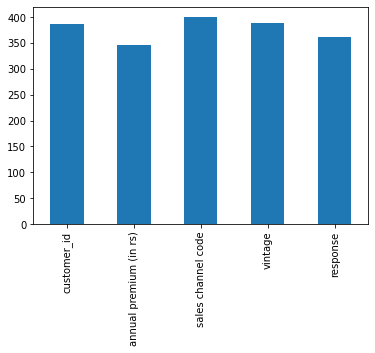

In [9]:
summary_of_null_values_for_customer_policy_details.plot.bar()

#### Drop Null values for customer_id because central tendencies for id’s is not feasible.

In [10]:
#in customer_details DataFrame

customer_details = customer_details.dropna(subset = ['customer_id'])

In [11]:
#in customer_policy_details DataFrame

customer_policy_details = customer_policy_details.dropna(subset = ['customer_id'])

#### Replace all null values for numeric columns by mean.

In [12]:
#For customer_details DataFrame

customer_details = customer_details.fillna(customer_details.mean(numeric_only = True))

In [13]:
#For customer_policy_details

customer_policy_details = customer_policy_details.fillna(customer_policy_details.mean(numeric_only = True))

####  Replace all null values for Categorical value by mode.

In [14]:
#In customer_details DataFrame

customer_details['Gender'] = customer_details['Gender'].fillna(customer_details.Gender.value_counts().index[0])
customer_details['vehicle age'] = customer_details['vehicle age'].fillna(customer_details['vehicle age'].value_counts().index[0])
customer_details['vehicle damage'] = customer_details['vehicle damage'].fillna(customer_details['vehicle damage'].value_counts().index[0])

In [15]:
#check if any null values present in customer_details DataFrame

customer_details.isna().sum()

customer_id                0
Gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

<AxesSubplot:>

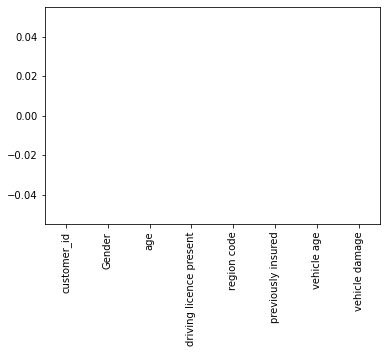

In [16]:
customer_details.isna().sum().plot.bar()

In [17]:
#check if any null values present in customer_policy_details DataFrame

customer_policy_details.isna().sum()

customer_id               0
annual premium (in rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64

<AxesSubplot:>

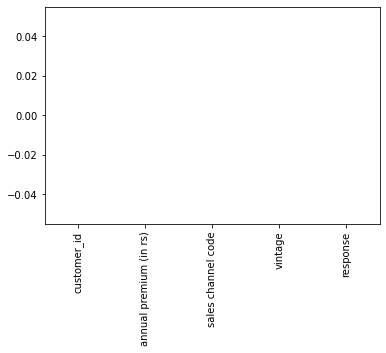

In [18]:
customer_policy_details.isna().sum().plot.bar()

### ii. Outliers

#### Generate a summary of count of all the outliers column wise

In [19]:
customer_details.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997868,26.389436,0.458259
std,110016.805160,15.504826,0.046104,13.223671,0.498006
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [20]:
def find_outliers_IQR(df):
    
    """This Method Finds the Outliers present in a DataFrame"""

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [21]:
#find outliers for coulmns in customer_details DataFrame
outliers = find_outliers_IQR(customer_details['customer_id'])
a = outliers.value_counts().sum()
outliers1 = find_outliers_IQR(customer_details['age'])
b = outliers1.value_counts().sum()
outliers2 = find_outliers_IQR(customer_details['driving licence present'])
c = outliers2.value_counts().sum()
outliers3 = find_outliers_IQR(customer_details['region code'])
d = outliers3.value_counts().sum()
outliers4 = find_outliers_IQR(customer_details['previously insured'])
e = outliers4.value_counts().sum()

In [22]:
#creating a DataFrame to display the summary of count of outliers column wise
outliers_in_customer_details = pd.DataFrame([a,b,c,d,e],['customer_id','age','driving licence present','region code','previously insured'],columns = ['num of outliers'])

In [23]:
outliers_in_customer_details

,num of outliers
customer_id,0
age,0
driving licence present,1203
region code,0
previously insured,0


<AxesSubplot:>

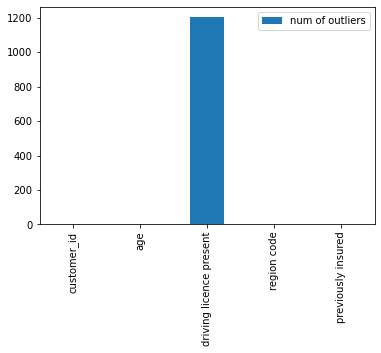

In [24]:
outliers_in_customer_details.plot.bar()

In [25]:
#find outliers for coulmns in customer_policy_details DataFrame
outliers = find_outliers_IQR(customer_policy_details['customer_id'])
a = outliers.value_counts().sum()
outliers1 = find_outliers_IQR(customer_policy_details['annual premium (in rs)'])
b = outliers1.value_counts().sum()
outliers2 = find_outliers_IQR(customer_policy_details['sales channel code'])
c = outliers2.value_counts().sum()
outliers3 = find_outliers_IQR(customer_policy_details['vintage'])
d = outliers3.value_counts().sum()
outliers4 = find_outliers_IQR(customer_policy_details['response'])
e = outliers4.value_counts().sum()

In [26]:
#creating a DataFrame to display the summary of count of outliers column wise
outliers_in_customer_policy_details = pd.DataFrame([a,b,c,d,e],['customer_id','annual premium (in rs)','sales channel code','vintage','response'],columns = ['num of outliers'])

In [27]:
outliers_in_customer_policy_details

,num of outliers
customer_id,0
annual premium (in rs),10332
sales channel code,0
vintage,0
response,46965


<AxesSubplot:>

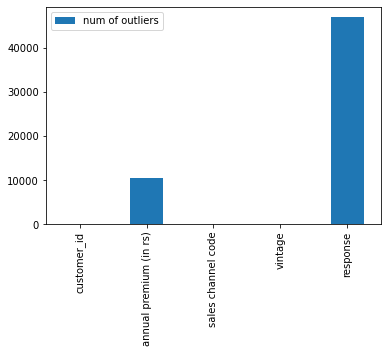

In [28]:
outliers_in_customer_policy_details.plot.bar()

#### Replace all outlier values for numeric columns by mean

#### note : it is advised not to use the mean value as it is highly susceptible to outliers

In [29]:
def replace_outliers(df):
    
    """This Method replaces the Outliers with the mean in a DataFrame"""
    
    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    
    upper = df[~(df>(q3+1.5*IQR))].max()
    
    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper, df.mean(),np.where(df < lower,df.mean(),df))

    return df

In [30]:
#replacing outliers value with the mean value for customer_details DataFrame

#outliers value found only in 'driving licence present' column.

replace_outliers(customer_details['driving licence present'])

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:
#replacing outliers value with the mean value for customer_policy_details DataFrame

#outliers found in 'annual premium (in rs)' and 'response' column

replace_outliers(customer_policy_details['annual premium (in rs)'])
replace_outliers(customer_policy_details['response'])

array([0.12252571, 0.        , 0.12252571, ..., 0.        , 0.        ,
       0.        ])

In [32]:
customer_details.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997868,26.389436,0.458259
std,110016.805160,15.504826,0.046104,13.223671,0.498006
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [33]:
customer_policy_details.describe()

,customer_id,annual premium (in rs),sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122526
std,110013.824148,17190.147550,54.177046,83.628096,0.327737
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


### iii. White spaces

#### Remove whitespaces

In [34]:
#Remove whitespaces
customer_details['Gender'] = customer_details['Gender'].str.strip()

###  iv. case correction(lower or upper, any one) 

In [35]:
#Case correction to Upper case
customer_details['Gender'] = customer_details['Gender'].str.upper()
customer_details['Gender']

0           MALE
1           MALE
2           MALE
3           MALE
4         FEMALE
           ...  
381104      MALE
381105      MALE
381106      MALE
381107    FEMALE
381108      MALE
Name: Gender, Length: 380723, dtype: object

### v. Convert nominal data (categorical) into dummies 

#### Get dummies

In [50]:
#for 'Gender' column
Gender_dummy =pd.get_dummies(customer_details['Gender'])
Gender_dummy

,FEMALE,MALE
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
381104,0,1
381105,0,1
381106,0,1
381107,1,0


In [51]:
#for 'vehicle age' column
vehicle_age_dummy =pd.get_dummies(customer_details['vehicle age'])
vehicle_age_dummy

,1-2 Year,< 1 Year,> 2 Years
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
381104,1,0,0
381105,0,1,0
381106,0,1,0
381107,0,0,1


In [52]:
#for 'vehicle damage' column
vehicle_damage_dummy = pd.get_dummies(customer_details['vehicle damage'])
vehicle_damage_dummy

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
381104,1,0
381105,1,0
381106,1,0
381107,0,1


### vi. Drop Duplicates (duplicated rows)

In [37]:
#drop duplicated rows
customer_details = customer_details.drop_duplicates()
customer_details

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [38]:
customer_policy_details = customer_policy_details.drop_duplicates()
customer_policy_details

,customer_id,annual premium (in rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


##  3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

In [39]:
master_table = pd.merge(customer_details,customer_policy_details,on = 'customer_id')

In [40]:
master_table

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in rs),sales channel code,vintage,response
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


##  4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

###   i. Gender wise average annual premium

In [41]:
#Gender wise average annual premium
print('Gender wise average annual premium')
print(master_table.groupby('Gender')['annual premium (in rs)'].mean())

Gender wise average annual premium
Gender
FEMALE    30492.028478
MALE      30623.619273
Name: annual premium (in rs), dtype: float64


<AxesSubplot:xlabel='Gender', ylabel='Annual Premium (in Rs)'>

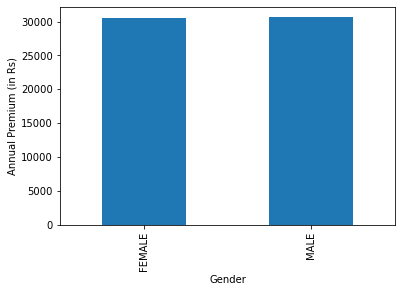

In [57]:
master_table.groupby('Gender')['annual premium (in rs)'].mean().plot.bar(ylabel = 'Annual Premium (in Rs)')

###  ii. Age wise average annual premium

In [43]:
#Age wise average annual premium
print('Age wise average annual premium')
print(master_table.groupby('age')['annual premium (in rs)'].mean())

Age wise average annual premium
age
20.0    26924.620173
21.0    30564.475810
22.0    30823.778102
23.0    30688.606298
24.0    31183.802890
            ...     
81.0    31201.571429
82.0    37705.379310
83.0    31012.727273
84.0    35440.818182
85.0    29792.363636
Name: annual premium (in rs), Length: 67, dtype: float64


<AxesSubplot:xlabel='age'>

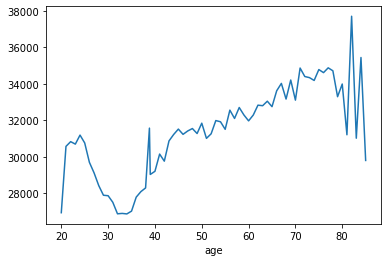

In [66]:
master_table.groupby('age')['annual premium (in rs)'].mean().plot()

###  iii. Is your data balanced between the genders?

Data is balanced gender wise


<AxesSubplot:xlabel='Gender', ylabel='Annual Premium (in Rs)'>

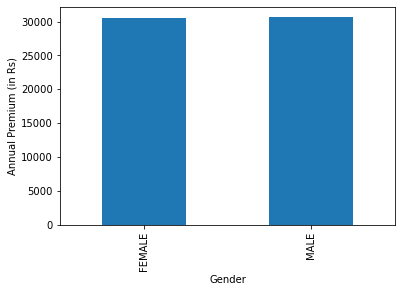

In [67]:
if master_table.groupby('Gender')['annual premium (in rs)'].mean().value_counts().iloc[0] == master_table.groupby('Gender')['annual premium (in rs)'].mean().value_counts().iloc[1]:
    print('Data is balanced gender wise')
else:
    print('Data is not balance gender wise')
master_table.groupby('Gender')['annual premium (in rs)'].mean().plot.bar(ylabel = 'Annual Premium (in Rs)')

### iv. Vehicle age wise average annual premium.

In [46]:
print('Vehicle age wise average annual premium')
print(master_table.groupby('vehicle age')['annual premium (in rs)'].mean())

Vehicle age wise average annual premium
vehicle age
1-2 Year     30524.629840
< 1 Year     30115.716367
> 2 Years    35657.520845
Name: annual premium (in rs), dtype: float64


<AxesSubplot:xlabel='vehicle age'>

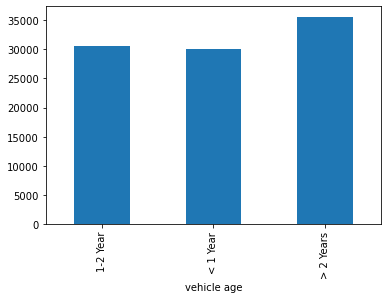

In [47]:
master_table.groupby('vehicle age')['annual premium (in rs)'].mean().plot.bar()

##  5. Is there any relation between Person Age and annual premium?

In [48]:
correlation_coefficient = master_table['age'].corr(master_table['annual premium (in rs)'])
correlation_coefficient

0.06771515986613913

In [49]:
if correlation_coefficient < -0.5:
    print('There is Strong negative relationship between Person Age and Annual Premium')
elif correlation_coefficient > 0.5:
    print('There is Strong postive relationship between Person Age and Annual Premium')
elif correlation_coefficient < 0.5 and 0.5 < correlation_coefficient:
    print('There is no relation between Person Age and Annual Premium')
else:
    print('There is a good relation between Person Age and Annual Premium')

There is a good relation between Person Age and Annual Premium
